In [2]:
from typing import List, Tuple

# Helper function to find the valley (local minimum)
def find_valley(heights: List[int]) -> int:
    n = len(heights)
    for i in range(1, n):
        if heights[i] > heights[i - 1]:
            return i - 1
    return n - 1

def program2(n: int, W: int, heights: List[int], widths: List[int]) -> Tuple[int, int, List[int], List[dict]]:
    logs = []  # Store logs for animation

    # --- Constraints Checks ---
    if any(h < 0 for h in heights) or any(w < 0 for w in widths) or n < 0 or W < 0:
        raise ValueError("All inputs must be non-negative.")

    # Find the valley (local minimum) in the unimodal sequence
    valley = find_valley(heights)
    
    platforms = []
    platforms2 = []
    sculptures_per_platform = []
    sculptures_per_platform2 = []
    current_width = 0
    current_width2 = 0  
    current_max_height = 0
    current_max_height2 = 0 
    current_count = 0
    current_count2 = 0
    current_platform_start = 0
    current_platform2_start = n - 1
    Valley_reached1 = 1
    Valley_reached2 = 1

    # Log valley identification
    logs.append({
        "step": "Identify Valley",
        "valley_index": valley,
        "highlight_indices": [valley],
        "platforms": platforms[:],
        "platforms2": platforms2[:]
    })

    # Check if valley is at the end
    if valley == n - 1:
        Valley_reached2 = 0
    elif valley == 0:
        Valley_reached1 = 0

    # Go through the sculptures from front and back same time
    for i in range(n):
        # Log current edges being checked
        logs.append({
            "step": "Check Front and Back Edges",
            "front_index": i if Valley_reached1 else None,
            "back_index": n - 1 - i if Valley_reached2 else None,
            "valley_index": valley,
            "highlight_indices": [valley],
            "platforms": platforms[:],
            "platforms2": platforms2[:]
        })

        # Front traversal
        if current_width + widths[i] > W:
            if i <= valley:
                platforms.append(current_max_height)
                sculptures_per_platform.append(current_count)
                logs.append({
                    "step": "Finalize Front Platform",
                    "finalized_indices": list(range(current_platform_start, i)),
                    "platforms": platforms[:],
                    "platforms2": platforms2[:]
                })
                current_width, current_max_height, current_count = 0, 0, 0
                current_platform_start = i
            else:
                Valley_reached1 = 0
                current_width, current_max_height, current_count = 0, 0, 0
        current_width += widths[i] * Valley_reached1
        current_max_height = max(current_max_height, heights[i]) * Valley_reached1
        current_count += 1

        # Back traversal
        if current_width2 + widths[n - 1 - i] > W:
            if n - 1 - i > valley:
                platforms2.insert(0, current_max_height2)
                sculptures_per_platform2.insert(0, current_count2)
                logs.append({
                    "step": "Finalize Back Platform",
                    "finalized_indices": list(range(current_platform2_start, n - i)),
                    "platforms": platforms[:],
                    "platforms2": platforms2[:]
                })
                current_width2, current_max_height2, current_count2 = 0, 0, 0
                current_platform2_start = n - 1 - i
            else:
                Valley_reached2 = 0
                current_width2, current_max_height2, current_count2 = 0, 0, 0
        current_width2 += widths[n - 1 - i] * Valley_reached2
        current_max_height2 = max(current_max_height2, heights[n - 1 - i]) * Valley_reached2
        current_count2 += 1

    added = False

    # Add sculptures in the ambiguous region to minimize total height
    if heights[current_platform_start] >= heights[current_platform2_start]:
        current_width, current_max_height, current_count = 0, 0, 0
        current_width2, current_max_height2, current_count2 = 0, 0, 0
        for j in range(current_platform_start, current_platform2_start + 1):
            if current_width + widths[j] > W:
                platforms.append(current_max_height)
                sculptures_per_platform.append(current_count)
                stophere = j
                added = True
                break
            current_width += widths[j]
            current_max_height = max(current_max_height, heights[j])
            current_count += 1
            
            # Log each sculpture being added to the platform
            logs.append({
                "step": "Add Sculpture to Platform",
                "current_index": j,
                "highlight_indices": [j],
                "platforms": platforms[:],
                "platforms2": platforms2[:]
            })
        

        if current_count > 0 and not added:
            platforms.append(current_max_height)
            sculptures_per_platform.append(current_count)

        if len(sculptures_per_platform) != 0 and sculptures_per_platform[-1] < current_platform2_start - current_platform_start + 1:
            platforms2.insert(0, heights[current_platform2_start])
            sculptures_per_platform2.insert(0, current_platform2_start - stophere + 1)

        platforms += platforms2
        sculptures_per_platform += sculptures_per_platform2

        # Log ambiguous region handling

        logs.append({
            "step": "Handle Ambiguous Region from Back",
            "handling_side": "Back",
            "finalized_indices": list(range(stophere, current_platform2_start + 1)) if added else list(range(current_platform2_start, current_platform_start + 1)),
            "platforms": platforms[:],
            "platforms2": platforms2[:]
        })
        
    else:
        current_width, current_max_height, current_count = 0, 0, 0
        current_width2, current_max_height2, current_count2 = 0, 0, 0
        for j in range(current_platform2_start, current_platform_start - 1, -1):
            if current_width2 + widths[j] > W:
                platforms2.insert(0, current_max_height2)
                sculptures_per_platform2.insert(0, current_count2)
                stophere = j
                added = True
                break
            current_width2 += widths[j]
            current_max_height2 = max(current_max_height2, heights[j])
            current_count2 += 1

        if current_count2 > 0 and not added:
            platforms2.insert(0, current_max_height2)
            sculptures_per_platform2.insert(0, current_count2)

        if len(sculptures_per_platform2) != 0 and sculptures_per_platform2[0] < current_platform2_start - current_platform_start + 1:
            platforms.append(heights[current_platform_start])
            sculptures_per_platform.append(stophere - current_platform_start + 1)

        platforms += platforms2
        sculptures_per_platform += sculptures_per_platform2

        # Add log for handling ambiguous region with finalized sculptures
        logs.append({
            "step": "Handle Ambiguous Region",
            "handling_side": "Back" if heights[current_platform_start] < heights[current_platform2_start] else "Front",
            "finalized_indices": list(range(current_platform_start, current_platform2_start + 1)) if added else [],
            "platforms": platforms[:],
            "platforms2": platforms2[:]
        })


    total_height = sum(platforms)

    # Final log
    logs.append({
        "step": "Finalizing All Platforms",
        "platforms": platforms[:],
        "platforms2": platforms2[:],
        "total_height": total_height
    })

    return len(platforms), total_height, sculptures_per_platform, logs

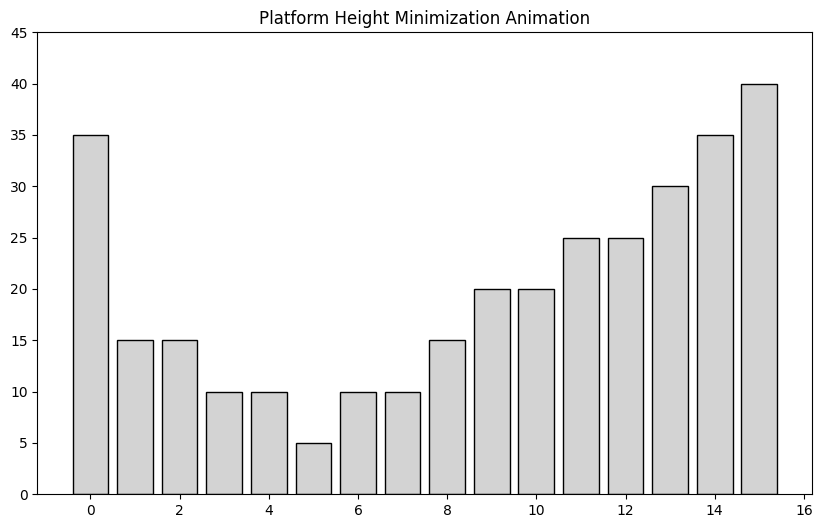

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Example inputs
n = 16
W = 10
heights = [35, 15, 15, 10, 10, 5, 10, 10, 15, 20, 20, 25, 25, 30, 35, 40]
widths = [  1,  2,  3,  8,  2, 5,  4,  6,  3,  3,  4,  1,  2,  7,  8, 2]

# Run your program to generate logs
_, _, _, logs = program2(n, W, heights, widths)

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(range(n), heights, color="lightgrey", edgecolor="black")
ax.set_ylim(0, max(heights) + 5)
ax.set_title("Platform Height Minimization Animation")

# Initialize the text and bar colors
text = ax.text(0.5, 1.05, "", transform=ax.transAxes, ha="center", fontsize=12)

def update(frame):
    # Clear the previous highlights
    for bar in bars:
        bar.set_color("lightgrey")

    # Current log state
    current_log = logs[frame]
    valley_index = current_log.get("valley_index", None)

    # Step description
    step_description = current_log.get("step", "Processing")

    # Valley remains highlighted in orange
    if valley_index is not None:
        bars[valley_index].set_color("orange")

    # Highlight the front and back indices
    front_index = current_log.get("front_index", None)
    back_index = current_log.get("back_index", None)

    if front_index is not None:
        bars[front_index].set_color("lightblue")
    if back_index is not None:
        bars[back_index].set_color("lightblue")

    # Highlight sculptures being added to the platform in green
    platform_indices = current_log.get("finalized_indices", [])
    for idx in platform_indices:
        bars[idx].set_color("green")

    # Finalize the platform, marking them in dark green
    if "finalized_indices" in current_log:
        for idx in current_log["finalized_indices"]:
            bars[idx].set_color("darkgreen")

    # Update the step description text
    text.set_text(step_description)


# Create animation
ani = FuncAnimation(fig, update, frames=range(len(logs)), repeat=False, interval=1000)

# Display the animation
plt.show()

In [5]:
for log in logs:
    print(log)

{'step': 'Identify Valley', 'valley_index': 5, 'highlight_indices': [5], 'platforms': [], 'platforms2': []}
{'step': 'Check Front and Back Edges', 'front_index': 0, 'back_index': 15, 'valley_index': 5, 'highlight_indices': [5], 'platforms': [], 'platforms2': []}
{'step': 'Check Front and Back Edges', 'front_index': 1, 'back_index': 14, 'valley_index': 5, 'highlight_indices': [5], 'platforms': [], 'platforms2': []}
{'step': 'Check Front and Back Edges', 'front_index': 2, 'back_index': 13, 'valley_index': 5, 'highlight_indices': [5], 'platforms': [], 'platforms2': []}
{'step': 'Finalize Back Platform', 'finalized_indices': [], 'platforms': [], 'platforms2': [40]}
{'step': 'Check Front and Back Edges', 'front_index': 3, 'back_index': 12, 'valley_index': 5, 'highlight_indices': [5], 'platforms': [], 'platforms2': [40]}
{'step': 'Finalize Front Platform', 'finalized_indices': [0, 1, 2], 'platforms': [35], 'platforms2': [40]}
{'step': 'Check Front and Back Edges', 'front_index': 4, 'back_ind

In [6]:
ani.save("algorithm2_animation.gif", writer="pillow", fps=1)